## Calculate Robustness Stats ##

Test data is generated from `src/test-xception-hb.py`.  
Two files are generated:
- class score file: class scores for each class  
- file name file: Maps all of the scores to the roi and file names
    

__Scores to generate__

- F1-score
- Recall
- Precision
- Confusuion Matrix


In [1]:
import pandas as pd
# from sklearn.metrics import f1_score, confusion_matrix
import sklearn.metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import os
from PIL import Image

Load Testing data

In [2]:

df = pd.read_csv("../output/20230216-soft-none_class.csv", index_col=0)
cols = df.columns
fnames = pd.read_csv("../output/20230216-soft-none_fnames.csv")
df['fname'] = fnames['fname']
df['base'] = fnames['base']
df['class'] = fnames['class']


df_soft = pd.read_csv("../output/20230216-soft-1_3_class.csv", index_col=0)
cols = df_soft.columns
fnames = pd.read_csv("../output/20230216-soft-1_3_fnames.csv")
df_soft['fname'] = fnames['fname']
df_soft['base'] = fnames['base']
df_soft['class'] = fnames['class']

In [3]:
def get_top_prob(row):
    """ return the top probability for a row """
    return row[cols].max()

def get_top_class(row):
    """ return the class name of the top class """
    ix = row[cols].values.argmax()
    return cols[ix]

In [4]:
df_soft['top_prob'] = df_soft.apply(get_top_prob,axis=1)
df_soft['top_class'] = df_soft.apply(get_top_class,axis=1)
df_soft['class_name'] = df_soft['class']
df_soft.head()


df['top_prob'] = df.apply(get_top_prob,axis=1)
df['top_class'] = df.apply(get_top_class,axis=1)
df['class_name'] = df['class']
df.head()


Akashiwo  Alexandrium_singlet  Amy_Gony_Protoc  Asterionellopsis  \
0  0.007929             0.000990     9.107120e-09      4.084455e-12   
1  0.010181             0.000396     3.152999e-11      2.543864e-14   
2  0.050487             0.044556     3.284021e-07      3.885024e-14   
3  0.026800             0.026244     1.045363e-08      2.564211e-13   
4  0.308486             0.007158     1.085467e-10      1.542535e-12   

    Boreadinium   Centric      Ceratium   Chaetoceros  Ciliates  \
0  1.131404e-07  0.000021  5.972353e-10  5.572043e-09  0.000002   
1  2.677608e-05  0.003890  3.722711e-10  5.175114e-09  0.000032   
2  4.897224e-05  0.005637  2.161419e-09  8.413080e-08  0.001784   
3  6.435865e-06  0.002715  5.346661e-09  1.677228e-08  0.008935   
4  2.352852e-06  0.015058  6.338682e-09  1.537219e-08  0.000761   

   Clusterflagellate  ...      Tontonia    Torodinium   Tropidoneis  \
0       7.354164e-07  ...  2.341341e-11  1.246854e-07  9.370702e-10   
1       5.658488e-07  ...  3.383587e-09  2.772989e-07  1.803955e-11   
2       1.901874e-08  ...  2.269120e-10  1.557166e-06  3.000962e-11   
3       4.566704e-09  ...  5.518087e-09  1.275717e-06  1.566988e-11   
4       5.491783e-10  ...  3.747901e-10  3.930901e-07  3.923000e-12   

   Vicicitus                                              fname  \
0   0.990730  /home/pcdaniel/Documents/IFCB/image-extraction...   
1   0.982576  /home/pcdaniel/Documents/IFCB/image-extraction...   
2   0.876239  /home/pcdaniel/Documents/IFCB/image-extraction...   
3   0.881114  /home/pcdaniel/Documents/IFCB/image-extraction...   
4   0.663807  /home/pcdaniel/Documents/IFCB/image-extraction...   

                                 base      class  top_prob  top_class  \
0  D20180714T050213_IFCB104_01096.png  Vicicitus  0.990730  Vicicitus   
1  D20180714T061222_IFCB104_02288.png  Vicicitus  0.982576  Vicicitus   
2  D20180714T072230_IFCB104_01085.png  Vicicitus  0.876239  Vicicitus   
3  D20180717T143205_IFCB104_00330.png  Vicicitus  0.881114  Vicicitus   
4  D20180717T160534_IFCB104_01565.png  Vicicitus  0.663807  Vicicitus   

   class_name  
0   Vicicitus  
1   Vicicitus  
2   Vicicitus  
3   Vicicitus  
4   Vicicitus  

[5 rows x 57 columns]

In [5]:
def open_image(actual, fname, top_class, precentage):
    BASE_DIR = "/home/pcdaniel/Documents/IFCB/image-extraction/20230216_sorted/test"
    full_fname = os.path.join(BASE_DIR, actual, fname)
    if os.path.exists(full_fname):
        pil_im = Image.open(full_fname) #Take jpg + png
        im_array = np.asarray(pil_im)
        plt.imshow(im_array,cmap='gray')
        plt.title("Pred: {} ({})\nActual: {}\n{}".format(top_class, round(precentage, 3), actual,fname),size=14,horizontalalignment='left',loc='left')
        plt.show()

    else:
        print("Couldn't find {}".format(fname))

## Estimate Metrics ##

In [6]:
sklearn.metrics.f1_score(df['class'], df['top_class'],average="weighted")

0.9425058164008819

In [7]:
f1_score = sklearn.metrics.f1_score(df['class'], df['top_class'],average="weighted")
accuracy = sklearn.metrics.accuracy_score(df['class'], df['top_class'],normalize=True)
report = sklearn.metrics.classification_report(df['class'], df['top_class'],labels=cols)
print(report)

                     precision    recall  f1-score   support

           Akashiwo       0.98      0.99      0.98      6247
Alexandrium_singlet       0.76      0.74      0.75       859
    Amy_Gony_Protoc       0.83      0.68      0.75       138
   Asterionellopsis       0.96      0.94      0.95       399
        Boreadinium       0.57      0.67      0.62        30
            Centric       0.89      0.93      0.91      5628
           Ceratium       0.97      0.99      0.98       695
        Chaetoceros       0.97      0.95      0.96      2647
           Ciliates       0.83      0.83      0.83       665
  Clusterflagellate       0.92      0.97      0.94       167
       Cochlodinium       0.88      0.86      0.87       825
          Corethron       0.98      0.84      0.91        63
        Cryptophyte       0.83      0.79      0.81       316
           Cyl_Nitz       0.94      0.84      0.89       479
        Det_Cer_Lau       0.93      0.81      0.87       863
          Dictyocha    

In [8]:
def report_to_df(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

results_df = report_to_df(report)
# results_df.to_csv('./figures/57-class-output.png')

In [10]:
results_df['f1-score'] = results_df['f1-score'].astype(float)
results_df['support'] = results_df['support'].astype(float)
results_df = results_df.sort_values(by='f1-score',ascending=False)
classes = results_df['Class Name'].values
fscore = results_df['f1-score'].values


Text(0.5, 1.0, 'Xception - softmax scaling: None\nTraining set: 2030216')

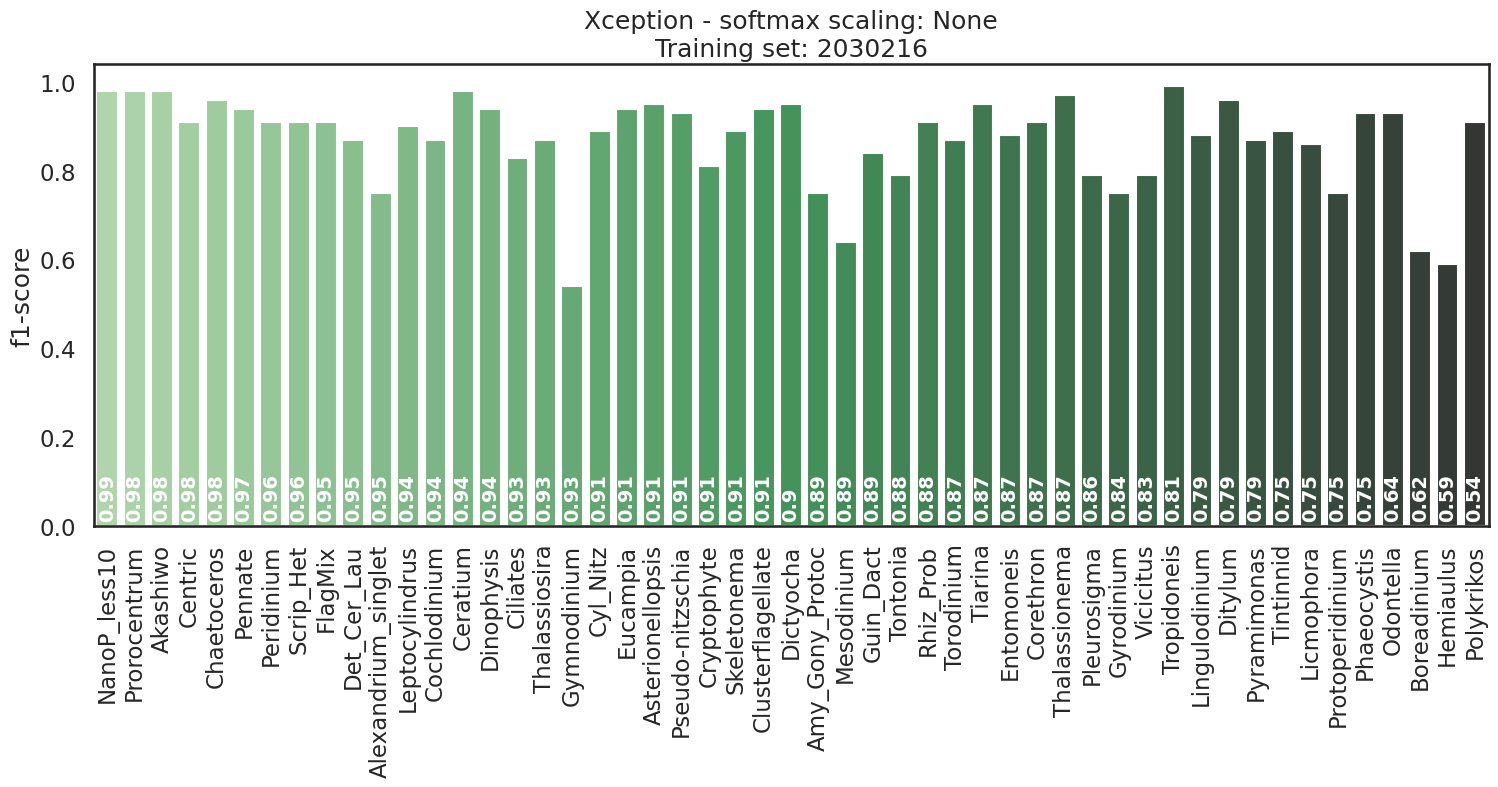

In [14]:
sns.set_context('talk')
fig, ax = plt.subplots()
fig.set_size_inches(18,6)

sns.barplot(x='Class Name', y='f1-score', data=results_df, palette="Greens_d")
ax.tick_params(axis='x', rotation=90)

ax.set_ylabel("f1-score")
ax.set_xlabel("")
for i, count in enumerate(fscore):
    div_by = 1/len(fscore)
    ax.text(div_by*i + .003,.02,str(count),rotation='vertical', transform=ax.transAxes,c='w',weight='bold',size=14)

plt.title("Xception - softmax scaling: None\nTraining set: 2030216")  
# plt.savefig("./figures/51_f-score-soft-1_3.png",dpi=300,bbox_inches='tight')

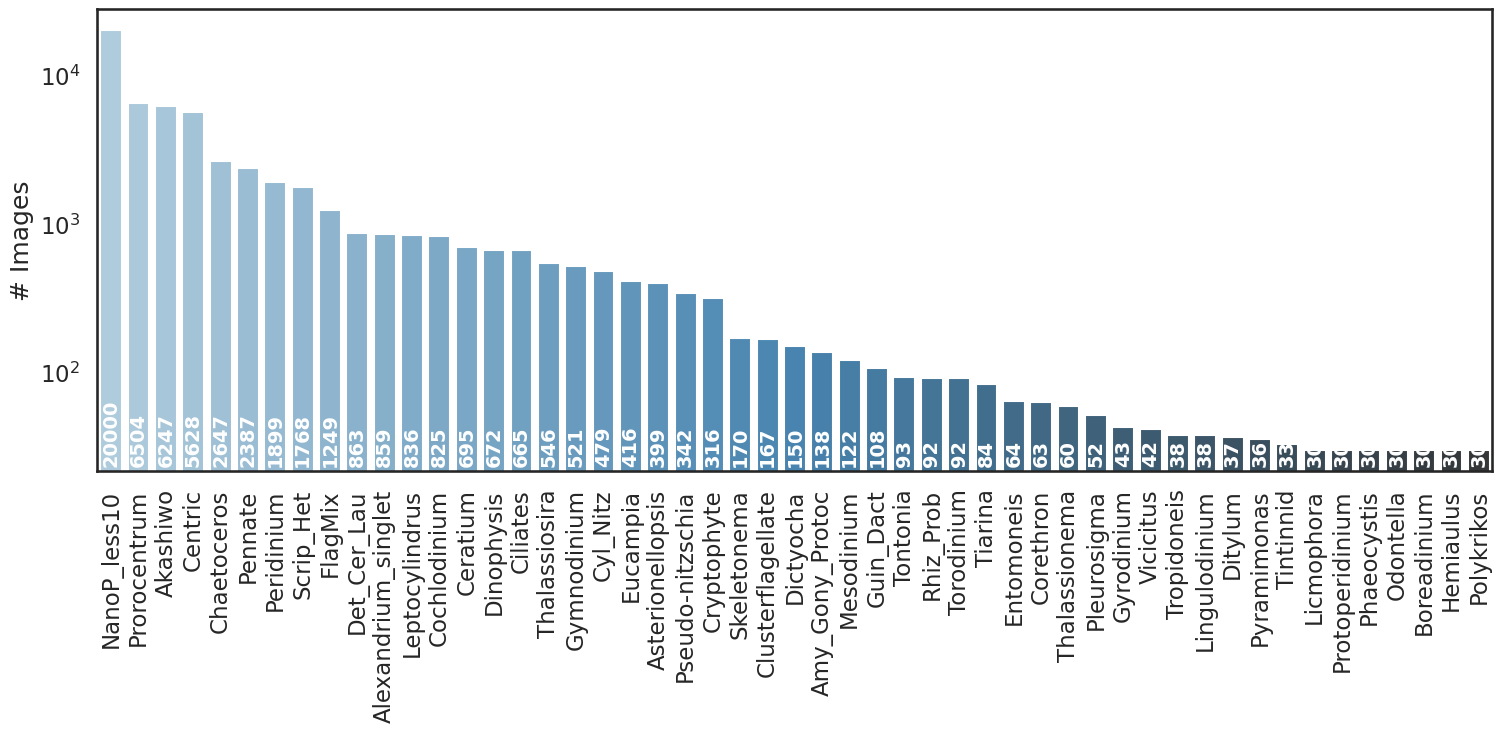

In [15]:
results_df = results_df.sort_values("support",ascending=False)

sns.set_context('talk')
sns.set_style('white')
fig, ax = plt.subplots()
fig.set_size_inches(18,6)

sns.barplot(x='Class Name', y='support', data=results_df, palette="Blues_d")
ax.tick_params(axis='x', rotation=90)
ax.set_yscale('log')

ax.set_ylabel("# Images")
ax.set_xlabel("")
for i, count in enumerate(results_df.support.values):
    div_by = 1/51
    ax.text(div_by*i + .003,.02,str(int(count)),rotation='vertical', transform=ax.transAxes,c='w',weight='bold',size=14)
# plt.savefig("./figures/51_training_count.png",dpi=300,bbox_inches='tight')

## Heatmap -  No threshold ##

Text(0.5, 1.0, 'Xception - softmax scaling: 1.3\nTraining set: 2030216')

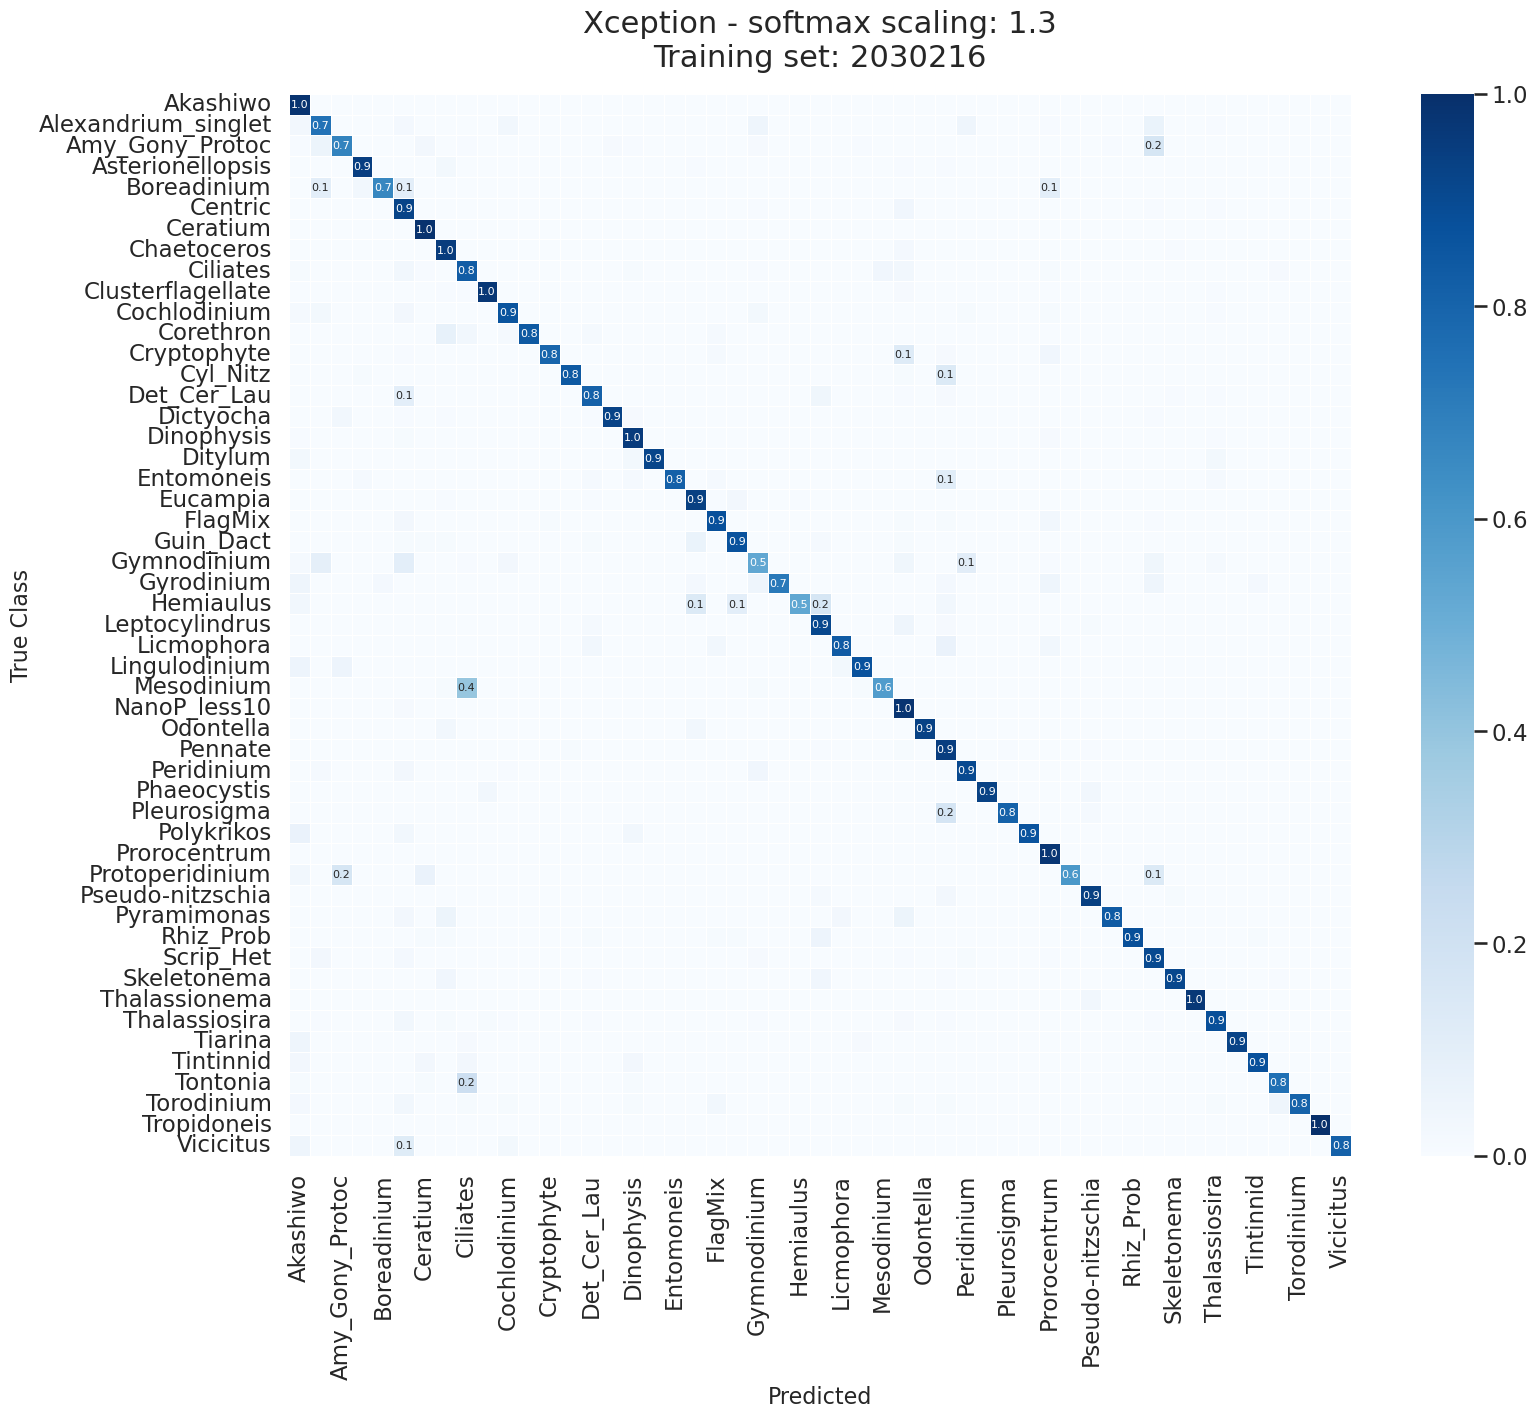

In [19]:
mat = pd.DataFrame(columns=cols, data = np.zeros((len(cols), len(cols))))
# mat = mat.append([0]*len(cols),i /gnore_index=True)
for i, true_class in enumerate(cols):
    t = df[df['class'] == true_class]
    tc = t['top_class'].values
    mat.iloc[i] = np.array([len(np.where(tc == col)[0]) for col in cols]) / len(tc)

mat.index = mat.columns

# sns.color_palette("rocket", as_cmap=True)
an = np.vectorize(lambda x: '' if x<0.1 else "{:.1f}".format(x))(mat.to_numpy())

fig, ax = plt.subplots()
fig.set_size_inches(18,18)
sns.heatmap(mat,ax=ax,cmap="Blues",square=True,vmin=0,vmax=1,linewidths=.5, annot=an, fmt = "",annot_kws={"size": 8})
ax.set_ylabel("True Class",size=16)
ax.set_xlabel("Predicted", size=16)
plt.subplots_adjust(top=.7)
plt.title("Xception - softmax scaling: 1.3\nTraining set: 2030216", size=22, pad=20)
# plt.savefig("./figures/51-class-prediction-matrix-soft-1_3.png",dpi=350,bbox_inches='tight')

## Recalcuate f1 with Class Specific Threshold ##

`thresh against`


In [6]:
def open_image(actual, fname, fig):
    
    if os.path.exists(fname):
        pil_im = Image.open(fname) #Take jpg + png
        im_array = np.asarray(pil_im)
        newax = fig.add_axes([0.68,0.65,0.2,0.2], anchor='NE', zorder=1)
        newax.imshow(im_array,cmap='gray')
        newax.axis('off')
        # plt.imshow(im_array,cmap='gray')
        # plt.title("Pred: {} ({})\nActual: {}\n{}".format(top_class, round(precentage, 3), actual,fname),size=14,horizontalalignment='left',loc='left')
    else:
        print("Couldn't find {}".format(fname))
        

In [76]:
#load threshold
import json
with open("../output/class_threshold.json", 'r') as file:
    thresh = json.load(file)
thresh_vals = np.array([thresh[k] for k in thresh.keys()])
print(thresh)

{'Akashiwo': 0.95, 'Alexandrium_singlet': 0.49, 'Amy_Gony_Protoc': 0.35, 'Asterionellopsis': 0.56, 'Boreadinium': 0.45, 'Centric': 0.7, 'Ceratium': 0.95, 'Chaetoceros': 0.89, 'Ciliates': 0.49, 'Clusterflagellate': 0.55, 'Cochlodinium': 0.48, 'Corethron': 0.29, 'Cryptophyte': 0.38, 'Cyl_Nitz': 0.56, 'Det_Cer_Lau': 0.52, 'Dictyocha': 0.6, 'Dinophysis': 0.92, 'Ditylum': 0.27, 'Entomoneis': 0.38, 'Eucampia': 0.88, 'FlagMix': 0.81, 'Guin_Dact': 0.37, 'Gymnodinium': 0.42, 'Gyrodinium': 0.63, 'Hemiaulus': 0.47, 'Leptocylindrus': 0.62, 'Licmophora': 0.57, 'Lingulodinium': 0.56, 'Mesodinium': 0.39, 'NanoP_less10': 0.92, 'Odontella': 0.51, 'Pennate': 0.81, 'Peridinium': 0.44, 'Phaeocystis': 0.81, 'Pleurosigma': 0.35, 'Polykrikos': 0.79, 'Prorocentrum': 0.92, 'Protoperidinium': 0.73, 'Pseudo-nitzschia': 0.62, 'Pyramimonas': 0.4, 'Rhiz_Prob': 0.47, 'Scrip_Het': 0.71, 'Skeletonema': 0.43, 'Thalassionema': 0.62, 'Thalassiosira': 0.36, 'Tiarina': 0.44, 'Tintinnid': 0.94, 'Tontonia': 0.46, 'Torodinium

True 41432: Ciliates
Ciliates: Prob = 0.6538880467414856 > 0.49




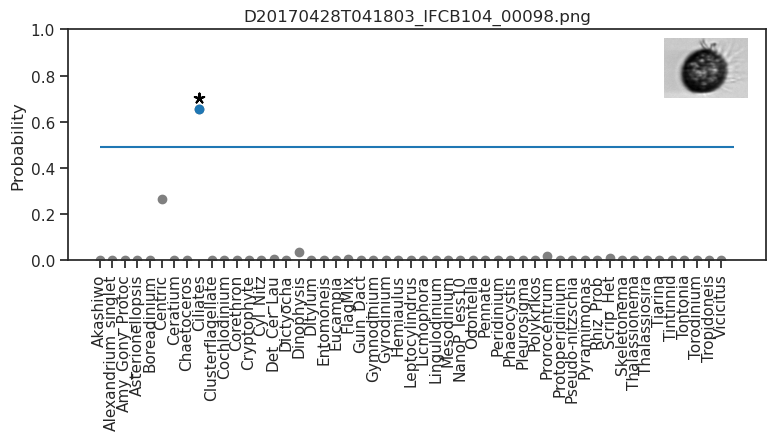

In [263]:
sns.set_context("notebook")
sns.set_style("ticks")
fig, ax = plt.subplots()
fig.set_size_inches(9,3)



rand_samples = df.query("class_name == 'Ciliates'")
rand_samples = rand_samples.sample(n=len(rand_samples))
num_hits = []
ixs = []
for ix, s in rand_samples.iterrows():
    prob = s.values[0:51]
    hits = np.where(prob > thresh_vals)[0]
    ixs.append(ix)
    num_hits.append(len(hits))
    if num_hits[-1] ==  1:

        print("True {}: {}".format(ix,s['class_name']))
        color = iter(plt.cm.tab10(np.linspace(0, 1, len(hits))))

        for i in hits:
            print("{}: Prob = {} > {}".format(s.index[i],prob[i],thresh[s.index[i]]))
            c = next(color)
            ax.hlines(thresh[s.index[i]],xmin=0,xmax=51,colors=c)
            ax.plot(i, prob[i],marker='o',color=c,zorder=100,)
            if s['class_name'] == s.index[i]:
                ax.scatter(i, prob[i]+.05, s=50, c='k', marker=(5, 2))
        
        print("\n")
        
        open_image(s['class_name'],s['fname'],fig)
        ax.scatter(x =  np.arange(51), y=prob,color='.5')
        ax.set_xticks(np.arange(51));
        ax.set_xticklabels(s.index[:51].values,rotation='vertical');
        ax.set_ylabel("Probability")
        plt.margins(0.01)
        ax.set_ylim(0,1)
        ax.set_title(s['base'])
        plt.savefig("./figures/threshold_example_17.png",dpi=300,bbox_inches='tight')
        break

In [223]:
num_hits

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [13]:
# USE 26029, 51264
# 35515
prob[i]

0.4939034283161163

# Stats with Class Specific Threshold #

Use the class specific thresholds for the validation data and recalculate the F1 Score, Acc, recall.

- Check if top class is above threshold.
- If not check if next class is above threshold. --> compare with two arrays `[probs] - [thresh] > 1`
    - Decide which one to use if multiple.
- If nothing is above the threshold

In [161]:
threshold_dataframe = pd.DataFrame.from_dict(thresh,orient='index',columns=['threshold'])
classes = threshold_dataframe.index
threshold_dataframe.head()

threshold
Akashiwo                  0.95
Alexandrium_singlet       0.49
Amy_Gony_Protoc           0.35
Asterionellopsis          0.56
Boreadinium               0.45

In [75]:
def map_prob(series, threshold):
    """ threshold_dataframep the probability """
    t_class = series.top_class
    thresh = threshold_dataframe.query("index ==@t_class").threshold.values[0]
    if series.top_prob > thresh:
        top_class_thresh = t_class
    else:
        top_class_thresh = "Unclassified"
    return top_class_thresh


top_class_thresh = []

for ix, s in df.iterrows():
    top_class_thresh.append(map_prob(s, threshold_dataframe))
    

In [189]:
prob_data = df[df.columns[:51]].values
ixs = np.greater(prob_data, thresh_vals)

ixs_greater_than_none = np.where(np.sum(ixs,axis=1) > 0)[0]
top_class_index = np.argmax(ixs[ixs_greater_than_none],axis=1)
top_class_values = [classes[c] for c in top_class_index]
top_class = np.repeat("Unclassified", repeats=prob_data.shape[0])
top_class[ixs_greater_than_none] = top_class_values

In [200]:
df['top_class_thresh'] = "Unclassified"
df["top_class_thresh"].loc[ixs_greater_than_none] = top_class_values

/tmp/ipykernel_95472/1558717360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["top_class_thresh"].loc[ixs_greater_than_none] = top_class_values


In [201]:
df.query("class_name == 'Alexandrium_singlet'")

Akashiwo  Alexandrium_singlet  Amy_Gony_Protoc  Asterionellopsis  \
51589  0.000387         6.762940e-03     1.316173e-07      2.271858e-15   
51590  0.001831         8.722975e-01     2.062160e-03      1.089458e-15   
51591  0.000695         9.078827e-01     8.056303e-04      7.487059e-10   
51592  0.000333         1.821558e-02     2.262503e-05      4.353904e-09   
51593  0.033374         9.397372e-02     6.305731e-04      1.707351e-07   
...         ...                  ...              ...               ...   
52443  0.000002         3.981978e-01     3.839342e-01      9.890353e-11   
52444  0.000105         1.103482e-01     1.463377e-03      9.874401e-11   
52445  0.000009         4.659697e-03     2.776022e-06      1.412407e-09   
52446  0.001041         9.466865e-01     3.238402e-04      1.470379e-15   
52447  0.999999         5.812285e-13     1.480274e-13      2.065431e-19   

        Boreadinium       Centric      Ceratium   Chaetoceros      Ciliates  \
51589  9.890056e-08  1.346077e-04  2.418298e-05  7.258419e-11  2.505044e-03   
51590  1.964374e-07  5.349073e-06  8.241382e-07  1.351964e-07  5.861015e-05   
51591  2.034657e-06  1.501855e-03  7.195324e-05  5.266903e-09  3.028339e-08   
51592  2.694405e-07  7.951855e-03  8.712481e-07  1.097756e-06  1.243020e-02   
51593  3.349494e-04  5.520916e-03  4.027189e-07  9.278246e-06  8.080192e-03   
...             ...           ...           ...           ...           ...   
52443  3.726655e-06  3.500750e-03  1.242724e-07  6.499767e-06  4.307257e-03   
52444  1.164853e-03  1.015542e-02  2.100366e-06  1.851617e-06  1.566317e-03   
52445  4.657508e-10  1.643913e-03  5.470718e-09  5.678188e-04  1.614290e-04   
52446  9.886312e-06  4.504024e-05  4.755387e-07  2.720466e-10  1.640608e-04   
52447  1.907990e-12  1.694910e-10  1.193860e-11  9.153121e-12  7.973756e-08   

       Clusterflagellate  ...   Tropidoneis     Vicicitus  \
51589       1.443640e-08  ...  4.867546e-14  1.310421e-08   
51590       9.825949e-12  ...  1.134409e-16  2.546833e-09   
51591       3.641462e-06  ...  8.014136e-11  1.474674e-07   
51592       9.412593e-08  ...  1.052642e-13  6.412110e-09   
51593       6.474740e-08  ...  1.808729e-12  3.568185e-07   
...                  ...  ...           ...           ...   
52443       2.334258e-02  ...  1.378498e-13  1.158885e-07   
52444       1.054373e-06  ...  2.169485e-12  2.160915e-05   
52445       2.770224e-10  ...  2.590457e-16  2.841350e-09   
52446       2.776250e-06  ...  1.147014e-12  8.230284e-10   
52447       8.921591e-18  ...  5.323491e-16  5.709929e-21   

                                                                                                                            fname  \
51589  /home/pcdaniel/Documents/IFCB/image-extraction/20230216_sorted/test/Alexandrium_singlet/D20160707T213853_IFCB104_00643.png   
51590  /home/pcdaniel/Documents/IFCB/image-extraction/20230216_sorted/test/Alexandrium_singlet/D20160804T000344_IFCB104_00190.png   
51591  /home/pcdaniel/Documents/IFCB/image-extraction/20230216_sorted/test/Alexandrium_singlet/D20160804T002725_IFCB104_01191.png   
51592  /home/pcdaniel/Documents/IFCB/image-extraction/20230216_sorted/test/Alexandrium_singlet/D20160804T011448_IFCB104_00184.png   
51593  /home/pcdaniel/Documents/IFCB/image-extraction/20230216_sorted/test/Alexandrium_singlet/D20160804T022551_IFCB104_00325.png   
...                                                                                                                           ...   
52443  /home/pcdaniel/Documents/IFCB/image-extraction/20230216_sorted/test/Alexandrium_singlet/D20220920T021739_IFCB104_01593.png   
52444  /home/pcdaniel/Documents/IFCB/image-extraction/20230216_sorted/test/Alexandrium_singlet/D20220920T021739_IFCB104_01629.png   
52445  /home/pcdaniel/Documents/IFCB/image-extraction/20230216_sorted/test/Alexandrium_singlet/D20220928T144016_IFCB104_00069.png   
52446  /home/pcdaniel/Documents/IFCB/image-extraction/20230216_sorted/test/Alexandrium_singlet

In [202]:
report = sklearn.metrics.classification_report(df['class_name'], df['top_class_thresh'],labels=cols)
print(report)

                     precision    recall  f1-score   support

           Akashiwo       1.00      0.93      0.96      6247
Alexandrium_singlet       0.81      0.71      0.76       859
    Amy_Gony_Protoc       0.81      0.71      0.76       138
   Asterionellopsis       0.97      0.94      0.95       399
        Boreadinium       0.59      0.67      0.62        30
            Centric       0.94      0.86      0.90      5628
           Ceratium       0.99      0.97      0.98       695
        Chaetoceros       0.99      0.89      0.94      2647
           Ciliates       0.85      0.81      0.83       665
  Clusterflagellate       0.93      0.97      0.95       167
       Cochlodinium       0.91      0.84      0.88       825
          Corethron       0.95      0.86      0.90        63
        Cryptophyte       0.80      0.81      0.81       316
           Cyl_Nitz       0.94      0.82      0.88       479
        Det_Cer_Lau       0.94      0.80      0.86       863
          Dictyocha    

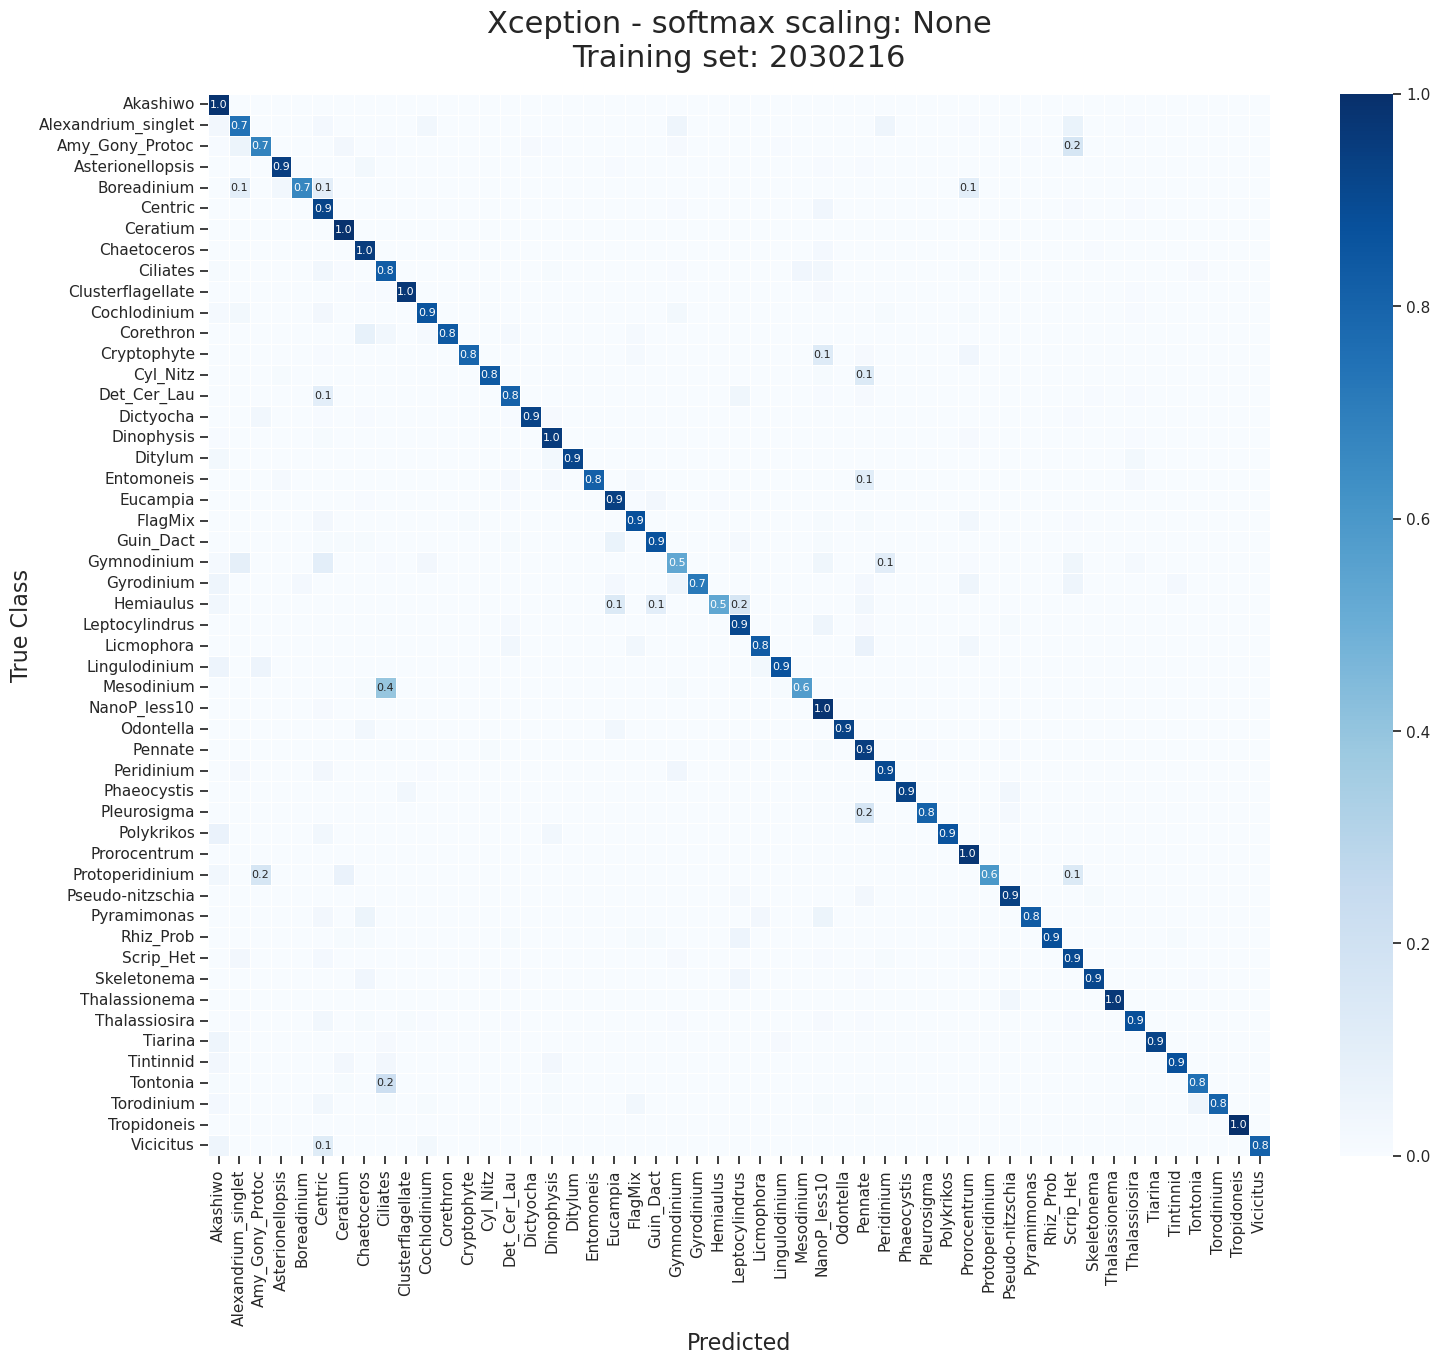

In [205]:
mat = pd.DataFrame(columns=cols, data = np.zeros((len(cols), len(cols))))
# mat = mat.append([0]*len(cols),i /gnore_index=True)
for i, true_class in enumerate(cols):
    t = df[df['class'] == true_class]
    tc = t['top_class'].values
    mat.iloc[i] = np.array([len(np.where(tc == col)[0]) for col in cols]) / len(tc)

mat.index = mat.columns

# sns.color_palette("rocket", as_cmap=True)
an = np.vectorize(lambda x: '' if x<0.1 else "{:.1f}".format(x))(mat.to_numpy())

fig, ax = plt.subplots()
fig.set_size_inches(18,18)
sns.heatmap(mat,ax=ax,cmap="Blues",square=True,vmin=0,vmax=1,linewidths=.5, annot=an, fmt = "",annot_kws={"size": 8})
ax.set_ylabel("True Class",size=16)
ax.set_xlabel("Predicted", size=16)
plt.subplots_adjust(top=.7)
plt.title("Xception - softmax scaling: None\nTraining set: 2030216", size=22, pad=20)
plt.savefig("./figures/51-class-prediction-matrix-soft-none-threshold.png",dpi=350,bbox_inches='tight')

In [48]:
s = df_soft.iloc[ix]
s

Akashiwo                                                             0.0
Alexandrium_singlet                                             0.000278
Amy_Gony_Protoc                                                 0.000001
Asterionellopsis                                                0.000058
Boreadinium                                                          0.0
Centric                                                          0.50168
Ceratium                                                             0.0
Chaetoceros                                                      0.00009
Ciliates                                                        0.001775
Clusterflagellate                                                0.00001
Cochlodinium                                                    0.000015
Corethron                                                       0.000001
Cryptophyte                                                     0.000119
Cyl_Nitz                                           

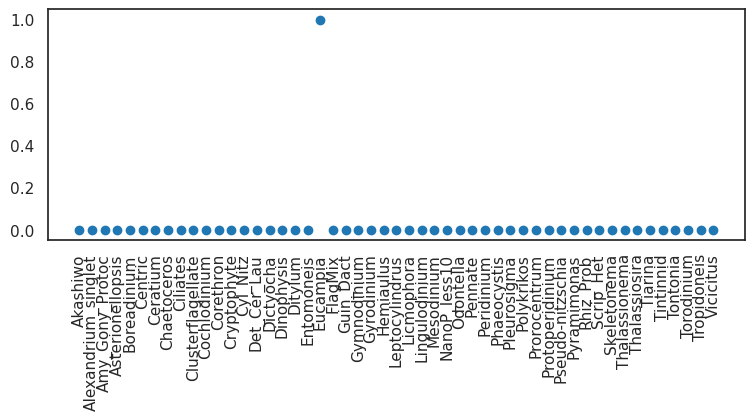

In [87]:
sns.set_context("notebook")
fig, ax = plt.subplots()
fig.set_size_inches(9,3)



ax.scatter(x =  np.arange(51), y=prob)
ax.set_xticks(np.arange(51));
ax.set_xticklabels(s.index[:51].values,rotation='vertical');
plt.margins(0.05)


## Habs specific

In [ ]:
hab_cols = ['Pseudo-nitzschia', 'Alexandrium_singlet', 'Dinophysis', 'Lingulodinium', 'Cochlodinium', 'Prorocentrum', 'Gymnodinium', 'Protoperidinium']

In [ ]:
habs_df = results_df.query("`Class Name` in @hab_cols")

In [ ]:
habs_df

__Count All Images used in training__

In [ ]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import shutil

In [ ]:
def count_files(subs):
    """Count the number of images in each folder"""
    num_files = []
    for sub in subs:
        # files = glob.glob(os.path.join("../training-images/alexis-via-axiom/raw", sub,"*.png"))
        # files = glob.glob(os.path.join("../training-images/synology-104-manual", sub, "*.png"))
        files = glob.glob(os.path.join("/Volumes/Extreme SSD/manual-classified-images/2022-06-01-sorted/train/", sub, "*.png"))
        num_files.append(len(files))
    return num_files
                        

In [ ]:
# labels = os.listdir("../training-images/alexis-via-axiom/raw")
labels = os.listdir("/Volumes/Extreme SSD/manual-classified-images/2022-06-01-sorted/train/")
image_count = count_files(labels)
image_count, labels = zip(*sorted(zip(image_count, labels), reverse=True))
image_count = list(image_count)
# image_count = image_count[:57]
labels = list(labels)
# labels = labels[:57]
if labels[-1] == ".DS_Store":
    labels = labels[:-1]
    image_count = image_count[:-1]

In [ ]:
df_count = pd.DataFrame(data={"class":labels,"counts":image_count})
df_count.sort_values('class')

In [ ]:
results_df = results_df.sort_values("Class Name")
results_df['traiing_count'] = df_count.sort_values('class')['counts']
results_df.head()

In [ ]:
# sns.set_theme(style="white")

import matplotlib
matplotlib.rc_file_defaults()
sns.set_context('talk')

fig, ax = plt.subplots()
fig.set_size_inches(18,6)

sns.scatterplot(x='traing_count',y='f1-score',data=results_df)
ax.set_xscale('log')
ax.set_ylim(0,1)
ax.set_xlim(0,1E6)

ax.set_xlabel("Image Count")
plt.title("IFCB104: Training Dataset (Accessed on June 2022)\n{} Classes".format(len(image_count)))  
plt.savefig("./figures/fscore_count_57class.png", dpi=300, bbox_inches='tight')

## Mountain plot of reults of HABS ##

In [ ]:
plot_data = mat.loc[hab_cols]
plot_data = plot_data.melt()
plot_data.head()

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
plot_data

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_data, row="variable", hue="variable", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# # passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "x")

# # Set the subplots to overlap
# g.figure.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)

In [ ]:
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

In [ ]:
df

## Checking the number within each group ##

In [ ]:
import os
import glob

In [ ]:
val_dir = "/Volumes/Extreme SSD/manual-classified-images/2022-06-01-sorted/test/*"
base = []
count = []
for b in sorted(glob.glob(val_dir)):
    count.append(len(glob.glob(os.path.join(b,"*.png"))))
    base.append(os.path.basename(b))

In [ ]:
for b,c in zip(base,count):
    fcount = fnames.groupby('class').count()['fname'][b]
    print("{} -- files: {} -- filecount: {}".format(b,c,fcount))

In [ ]:
82493